In [79]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

months = ["Janeiro", "Fevereiro", "Março", "Abril", "Maio", "Junho", "Julho", "Agosto", "Setembro", "Outubro", "Novembro", "Dezembro"]

# Leitura e análise do tempo no estado de SP

Primeiramente, realizamos a leitura dos arquivos `stations.csv`, que contem as estações de tempo,
e o arquivo `weather_sum_2023.csv` que contém os dados coletados por cada estação 

In [80]:
stations = pd.read_csv('./stations.csv')
weather_data = pd.read_csv('weather_sum_2023.csv')
weather_data['DATA (YYYY-MM-DD)'] = pd.to_datetime(weather_data['DATA (YYYY-MM-DD)'])

Filtramos apenas as estações do estado de São Paulo, e então filtramos os dados dessas estações

In [81]:
# Filtragem das estações
sp_stations = stations[ stations['state'] == 'SP' ]
sp_stations = sp_stations.reset_index(drop=True)

sp_stations_id = sp_stations['id_station']

# Filtragem dos dados
filt = weather_data['ESTACAO'].isin(sp_stations_id)
sp_data = weather_data.loc[filt]
sp_data = sp_data.reset_index(drop=True)

## Estações

In [82]:
sp_stations

,region,state,city_station,id_station,lat,lon,lvl,record_first,record_last
0,SE,SP,BAURU,A705,"-22,35805555","-49,02888888",666,2001-08-30,2024-10-31
1,SE,SP,CAMPOS DO JORDAO,A706,"-22,75027777","-45,60388888",1642,2002-03-13,2024-10-31
2,SE,SP,FRANCA,A708,"-20,57999999","-47,37999999",1026,2002-12-12,2024-07-20
3,SE,SP,PRESIDENTE PRUDENTE,A707,"-22,11999999","-51,4","435,55",2003-02-04,2024-10-31
4,SE,SP,SAO PAULO - MIRANTE,A701,"-23,48333333","-46,61666666","792,06",2006-07-25,2024-10-31
5,SE,SP,SAO CARLOS,A711,"-21,97972221","-47,88333333",863,2006-09-04,2024-10-31
6,SE,SP,IGUAPE,A712,"-24,71666666","-47,55","2,66",2006-07-20,2024-10-31
7,SE,SP,SOROCABA,A713,"-23,35","-47,66666666",609,2006-08-22,2024-10-31
8,SE,SP,ITAPEVA,A714,"-23,98138888","-48,88527777",745,2006-07-25,2024-10-31
9,SE,SP,SAO MIGUEL ARCANJO,A715,"-23,85138888","-48,16444444",678,2006-08-15,2024-06-10


## Dados

In [83]:
sp_data

,ESTACAO,DATA (YYYY-MM-DD),rain_max,rad_max,temp_avg,temp_max,temp_min,hum_max,hum_min,wind_max,wind_avg
0,A701,2023-01-01,0.8,3355.6,22.600000,28.6,18.1,92.0,48.0,8.0,1.150000
1,A701,2023-01-02,0.0,3856.8,23.412500,30.4,18.9,90.0,36.0,12.4,1.875000
2,A701,2023-01-03,6.2,3132.3,23.191667,27.1,20.1,88.0,53.0,11.5,1.816667
3,A701,2023-01-04,7.2,3066.6,21.341667,25.2,16.9,93.0,61.0,12.2,2.358333
4,A701,2023-01-05,5.2,982.5,17.262500,18.5,16.6,96.0,85.0,7.0,1.712500
...,...,...,...,...,...,...,...,...,...,...,...
14020,A771,2023-12-27,0.2,2893.3,19.754167,23.2,17.4,93.0,59.0,NaN,NaN
14021,A771,2023-12-28,0.0,3712.1,21.337500,30.2,16.6,89.0,40.0,NaN,NaN
14022,A771,2023-12-29,0.0,3540.6,26.200000,35.3,19.4,94.0,31.0,NaN,NaN
14023,A771,2023-12-30,4.0,808.6,21.250000,27.9,18.4,94.0,50.0,NaN,NaN


### Temperaturas de cada estação por mês

In [84]:
def get_temps_per_month(station_id: str):
    # Separa a estação com as datas, e seta todos os dias para serem dia 1, de forma a deixar apenas os mêses para diferenciar
    temps = sp_data.loc[ (sp_data['ESTACAO'] == station_id) , ('DATA (YYYY-MM-DD)', 'temp_avg')]
    temps['DATA (YYYY-MM-DD)'] = temps['DATA (YYYY-MM-DD)'].apply(lambda x: x.replace(day=1))
    
    # Agrupa os mêses, calculando a média das temperaturas
    temp_avg_month = temps.groupby('DATA (YYYY-MM-DD)').mean().reset_index()
    
    return temp_avg_month

Exemplo para a estação `A701` de Bauru:

(0.0, 40.0)

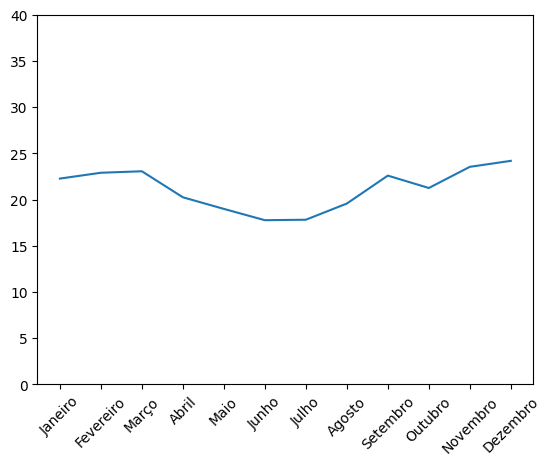

In [85]:
data = get_temps_per_month('A701')
plt.plot(months, data['temp_avg'])
plt.xticks(rotation=45)
plt.ylim(bottom=0, top=40)

Agora para todas as estações (Retirando resultados com NaN)

(0.0, 40.0)

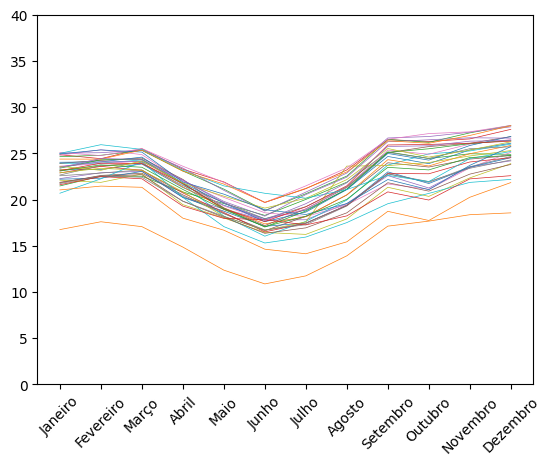

In [105]:
data = sp_stations['id_station'].apply(lambda st: get_temps_per_month(st)['temp_avg']).dropna()
data = np.array(data)

for st in data[:]:
    plt.plot(months, st, lw=0.5)
plt.xticks(rotation=45)
plt.ylim(bottom=0, top=40)

Média de temperatura em todas as estações de estado

(0.0, 40.0)

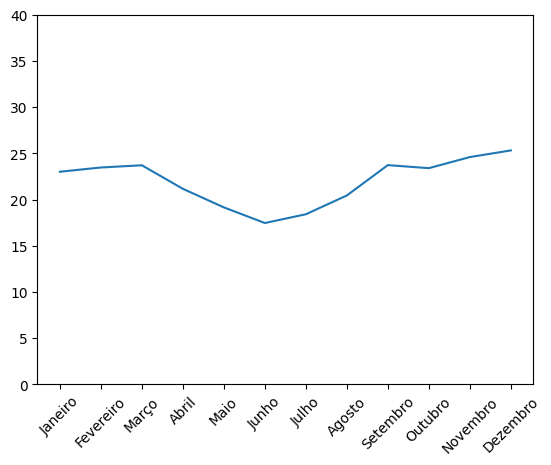

In [120]:
months_per_st = data.T
means = [temps.mean() for temps in months_per_st]

plt.plot(months, means)
plt.xticks(rotation=45)
plt.ylim(bottom=0, top=40)

### Utils:

In [9]:
print(sp_data.columns)
print('\n----\n')
print(sp_stations.columns)

Index(['ESTACAO', 'DATA (YYYY-MM-DD)', 'rain_max', 'rad_max', 'temp_avg',
       'temp_max', 'temp_min', 'hum_max', 'hum_min', 'wind_max', 'wind_avg'],
      dtype='object')

----

Index(['region', 'state', 'city_station', 'id_station', 'lat', 'lon', 'lvl',
       'record_first', 'record_last'],
      dtype='object')
